## Machine Learning Final Project 
### Assignment : Building a classfication model to detect edible or poisonous mushrooms 
### Name : Imanuel Annoh 

### Overview of Work 

This notebook shows the workflow of building a classification model from stratch capable of detecting whether a given mushroom was either edible of poisonous. The mushroom dataset(agaricus-lepiota) used here to train the classification model was drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf. To begin, the dataset agaricus-lepiota.csv was loaded and stored as a dataframe and used to train the machine model.The file agaricus lepiota.names was used for data description and also for understanding the features in the dataset. This file however was not used in the model's training process.  

I preprocessed the data checking for missing or null values present in the dataset by calling the isnull().sum() function to check the number of missing values that were present in each column.
The csv file was then split into features (X) and target variable (y). The target variable in this case was the first column denoting p or e for either poisionous or edible. The iloc function was used since it was a more straightfoward way to index the first column which was our target column and then using the remaining columns as our feature columns. After, the dataset was then further split into training (80%) and testing data (20%) using scikit learns import module train_test_split.

Another preprocessing step of the dataset was performing a one hot encoding on our categorical features and label encoding on the target variable. One hot encoding was used to convert the categorical features into numerical binary columns for our machine learning model and label encoding was used to convert the target variable into numerical values; Both of which are useful in processing data more effectively by our machine learning model. 
I used the pd.get dummies function for one hot encoding to generate binary columns to serve as input for our neural network. I also used scikits learn module Label Encoder to convert my target variable into binary values where 0 was edible and 1 was poisonous. I then fit transform my y_train training data and then also transformed my y_test testing data. I also had to make sure my training set ( X_test_encoded ) and test set (X_test_encoded) had the same number of columns to maintain a consistent input for the model. 

I then constructed a neural network with two layers (An input layer and an output layer). The input layer consisted of 94 features after performing one hot encoding and my ouput layer was a single neuron with a sigmoid activation since this task was a binary classifier task. I compiled the network using the Adam optimizer, binary cross entropy loss and accuracy as my metric. I then trained the model on the one hot encoding training data and the training time was measured using the time magic command. 

It was then time to evaluate the neural network using a confusion matrix. One special note here was I had to convert my X_test_encoded variable into a numpy and float datatype because I kept getting a Value error where Tensor's model predict function could not handle my input data's datatype. Hence I had to ensure the data was in the correct format for tensor to handle it correctly. To make my predictions, I applied a threshold of 0.5 to the model’s output probabilities, converting them into binary class labels and then computed and displayed a confusion matrix to evaluate the model’s performance by comparing the actual and predicted labels. The confusion matrix display was then used to visualize the confusion matrix to show if there were any false negatives or positives.

After evaluating the model I PCA'd the data to reduce the dimensionality which had been increased by one hot encoding. I was still however retaining 95% variance in the data while reducing the dimensionality of my data. The number of features after PCA was 38 compared to 94 in my original neural network. I performed the pca by calling the PCA module from sklearn and then I instantiated PCA in a new pca variable and then used this varible to fit transform the X_train encoded training data and transformed X_test encoded test data. 

I then trained a new neural model using this new transformed pca training and test data. So here instead of using the same input dimension prameter from my original neural network as my input_dim, I used this new pca training data. I also reduced the number of neurons from 32 to 16 since I was dealing with less number of features. This PCA based model was then trained and the training time was recorded with the time magic command. As with the original neural network, I also evaluated the models performance using sklearns confusion matrix module. 

I then saved the PCA model to a pickle file called model.pkl


### Additional Notes / Results

- There was no missing or null values in the dataset 
- The orignal neural network had a traing time of 1.77s at the end of 20 epochs with a validation and accuracy score of 1. Also the confusion matrix showed no false positives or negatives
- The pca neural network had a training time of 1.75s at the end of 20 epochs with a accuracy score of 0.9996 and a validation score of 1. Also the confusion matrix showed no false positives or negatives
- These results indicates that the model was able to properly classify whether a mushroom was edible or poisonous in both neural networks. 







In [53]:
#Common imports for loading dataset 
import numpy as np 
import pandas as pd 

#Description of the mushroom dataset 
with open('Data/agaricus-lepiota.names', 'r') as f:
    names = f.read()
    print(names)

#Loading the csv file 
mushroom_data = pd.read_csv('Data/agaricus-lepiota.csv', header=None)


1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [54]:
#Checking for null or missing values
missing_values = mushroom_data.isnull().sum()
missing_values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [55]:
#Splitting the csv file into training and testing data 
from sklearn.model_selection import train_test_split

X = mushroom_data.iloc[:, 1:]  #Features 
y = mushroom_data.iloc[:, 0]   # Target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [56]:
#One-Hot Encoding features
X_train_encoded = pd.get_dummies(X_train, drop_first = True)
X_test_encoded = pd.get_dummies(X_test, drop_first = True)

#Ensuring the training and test sets have the same number of columns 
X_test_encoded = X_test_encoded.reindex(columns = X_train_encoded.columns, fill_value = 0)


#Label Encoding the target variable 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [57]:
#Creating a neural network 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the neural network
model = Sequential([Dense(units = 32, activation = 'relu', input_dim= X_train_encoded.shape[1]),Dense(units= 1, activation='sigmoid')])

# Compiling the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [58]:
%%time
history = model.fit(X_train_encoded, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1) #training the model and measuring how long it took to run

Epoch 1/20
163/163 [==============================] - 0s 794us/step - loss: 0.2562 - accuracy: 0.9242 - val_loss: 0.0969 - val_accuracy: 0.9715
Epoch 2/20
163/163 [==============================] - 0s 470us/step - loss: 0.0567 - accuracy: 0.9875 - val_loss: 0.0361 - val_accuracy: 0.9954
Epoch 3/20
163/163 [==============================] - 0s 447us/step - loss: 0.0237 - accuracy: 0.9967 - val_loss: 0.0188 - val_accuracy: 0.9985
Epoch 4/20
163/163 [==============================] - 0s 439us/step - loss: 0.0130 - accuracy: 0.9990 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/20
163/163 [==============================] - 0s 436us/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 6/20
163/163 [==============================] - 0s 432us/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/20
163/163 [==============================] - 0s 444us/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.0040 - val_accuracy:

51/51 [==============================] - 0s 239us/step


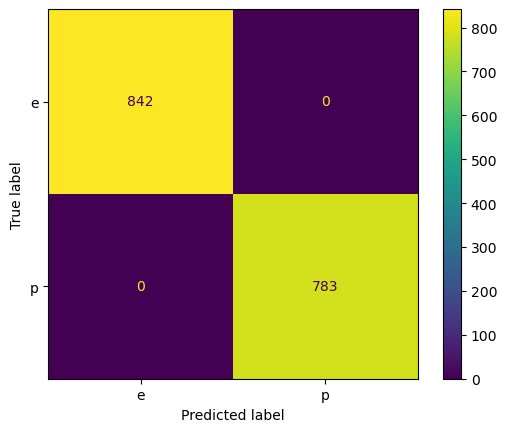

In [59]:
#Analyzing results with Confusion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Ensuring X_test_encoded is in a numpy array and a float datatypes to fix mismatched datatypes 
X_test_encoded = X_test_encoded.to_numpy()  
X_test_encoded = X_test_encoded.astype('float32')  # Ensure float32 data type

# Making predictions
y_predictions = (model.predict(X_test_encoded) > 0.5).astype(int)
# Make predictions
y_predictions = (model.predict(X_test_encoded) > 0.5).astype(int)

# Compute and displaying the confusion matrix
cm = confusion_matrix(y_test_encoded, y_predictions)
display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= label_encoder.classes_)
display.plot()

In [60]:
# Performing dimensionality reduction with PCA 
from sklearn.decomposition import PCA

# Performing PCA (0.95 retaining variance)
pca = PCA(n_components= 0.95)  
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

# Number of features after PCA
print(X_train_pca.shape[1])

38


/Users/imanuelannoh/anaconda3/envs/dtsc680/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [61]:
#Training Neural Network on PCA data 
# Define the new neural network
pca_model = Sequential([Dense(units=16, activation='relu', input_dim=X_train_pca.shape[1]),Dense(units=1, activation='sigmoid')])

# Compile the new pca model
pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [62]:
%%time
pca_history = pca_model.fit(X_train_pca, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
163/163 [==============================] - 0s 757us/step - loss: 0.4144 - accuracy: 0.8896 - val_loss: 0.2568 - val_accuracy: 0.9646
Epoch 2/20
163/163 [==============================] - 0s 450us/step - loss: 0.1720 - accuracy: 0.9740 - val_loss: 0.1178 - val_accuracy: 0.9754
Epoch 3/20
163/163 [==============================] - 0s 418us/step - loss: 0.0895 - accuracy: 0.9817 - val_loss: 0.0722 - val_accuracy: 0.9838
Epoch 4/20
163/163 [==============================] - 0s 421us/step - loss: 0.0594 - accuracy: 0.9856 - val_loss: 0.0514 - val_accuracy: 0.9877
Epoch 5/20
163/163 [==============================] - 0s 412us/step - loss: 0.0438 - accuracy: 0.9898 - val_loss: 0.0386 - val_accuracy: 0.9938
Epoch 6/20
163/163 [==============================] - 0s 434us/step - loss: 0.0343 - accuracy: 0.9933 - val_loss: 0.0303 - val_accuracy: 0.9946
Epoch 7/20
163/163 [==============================] - 0s 432us/step - loss: 0.0275 - accuracy: 0.9958 - val_loss: 0.0243 - val_accuracy:

51/51 [==============================] - 0s 319us/step


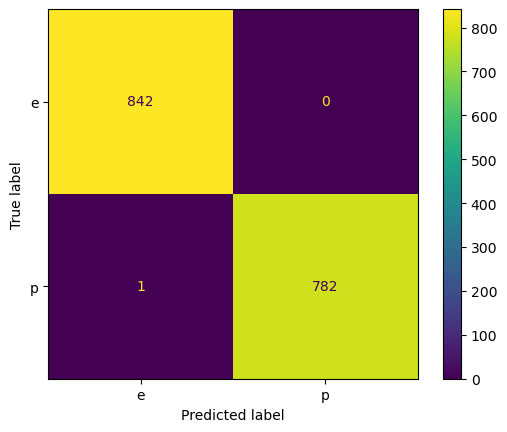

In [63]:
# Predictions with PCA model
y_pca_prediction = (pca_model.predict(X_test_pca) > 0.5).astype(int)

# Computing the confusion matrix
pca_cm = confusion_matrix(y_test_encoded, y_pca_prediction)

# Displaying the confusion matrix
pca_display = ConfusionMatrixDisplay(confusion_matrix=pca_cm, display_labels=label_encoder.classes_)
pca_display.plot()

In [64]:
#Saving the PCA model 
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [50]:
#Model Summary 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                3040      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


## Concept Questions

a. How many features does the data have after the One-Hot Encoding? How does
this compare to the number of features that the data had before the encoding?

After one hot encoding the number of features increased from 22 to 94. 


b. What should the units parameter of the second layer in the network be and why?

Since this is a binary classification problem, the second layer should have 1 unit parameter and also with a 
sigmoid activation


c. How many connections does your neural network contain?

3073 connections 


d. How many features does the training data contain after dimensionality reduction?
How does this compare with the encoded data?

38 features after perfoming dimensionality reduction which is a decrease from 94 features after performing one hot encoding. 


e. Why does the input_dim parameter of the first layer need to change from the
previous neural network?

The input_dim parameter needed to change since the number of features changed. The input_dim parameter always must 
equal the number of features put into the model for training. 


f. Compare the training time of the original neural network with the training time of
the PCA neural network. Are the results what you expected?

The training time of the original neural network did not change much from the pca neural network. I did expect the pca neural network to train faster since it had a reduced number of features compared to the origional neural network with 94 features

